In [1]:
!nvidia-smi

Tue Jul 18 18:12:42 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
! pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                               title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                             Spotify and Youtube                                 9MB  2023-03-20 15:43:25           8564        313  1.0              
ppb00x/country-gdp                                                Country_GDP                                         7KB  2023-04-07 06:47:36           1222         36  1.0              
erdemtaha/cancer-data                                             Cancer Data                                        49KB  2023-03-22 07:57:00           3834         91  1.0              
omartorres25/honda-data                                     

In [ ]:
!kaggle datasets download -d masoudnickparvar/white-blood-cells-dataset

100% 497M/499M [00:27<00:00, 24.8MB/s]
100% 499M/499M [00:27<00:00, 19.2MB/s]


In [ ]:
!unzip /content/white-blood-cells-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Train/Neutrophil/95-8-1-1_253_2.jpg  
  inflating: Train/Neutrophil/95-8-1-1_256_1.jpg  
  inflating: Train/Neutrophil/95-8-1-1_257_1.jpg  
  inflating: Train/Neutrophil/95-8-1-1_259_1.jpg  
  inflating: Train/Neutrophil/95-8-1-1_25_1.jpg  
  inflating: Train/Neutrophil/95-8-1-1_265_1.jpg  
  inflating: Train/Neutrophil/95-8-1-1_268_1.jpg  
  inflating: Train/Neutrophil/95-8-1-1_269_1.jpg  
  inflating: Train/Neutrophil/95-8-1-1_270_1.jpg  
  inflating: Train/Neutrophil/95-8-1-1_274_3.jpg  
  inflating: Train/Neutrophil/95-8-1-1_275_2.jpg  
  inflating: Train/Neutrophil/95-8-1-1_276_1.jpg  
  inflating: Train/Neutrophil/95-8-1-1_276_2.jpg  
  inflating: Train/Neutrophil/95-8-1-1_281_3.jpg  
  inflating: Train/Neutrophil/95-8-1-1_281_4.jpg  
  inflating: Train/Neutrophil/95-8-1-1_282_1.jpg  
  inflating: Train/Neutrophil/95-8-1-1_283_2.jpg  
  inflating: Train/Neutrophil/95-8-1-1_285_2.jpg  
  inflating: Train/Neutrophil/95

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import os
import random

#importing library for data visualization
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

#importing tensorflow for model creation
import tensorflow
import tensorflow as tf
from keras.models import Sequential

#Generate batches of tensor image data with real time data augmentation
from keras.preprocessing.image import ImageDataGenerator

#for enabling inline plotting
%matplotlib inline

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  TrainingImagePath,
  validation_split=0.2,
  label_mode='categorical',
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10175 files belonging to 5 classes.
Using 8140 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  TrainingImagePath,
  validation_split=0.2,
  label_mode='categorical',
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10175 files belonging to 5 classes.
Using 2035 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Basophil', 'Eosinophil', 'Lymphocyte', 'Monocyte', 'Neutrophil']


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = len(class_names)

from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(180, 180, 3))

# Freeze the weights of the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
255/255 [==============================] - 1358s 5s/step - loss: 2.7066 - accuracy: 0.7059 - val_loss: 0.4672 - val_accuracy: 0.8305
Epoch 2/10
255/255 [==============================] - 1348s 5s/step - loss: 0.6137 - accuracy: 0.7856 - val_loss: 0.3458 - val_accuracy: 0.8855
Epoch 3/10
255/255 [==============================] - 1348s 5s/step - loss: 0.4738 - accuracy: 0.8301 - val_loss: 0.3166 - val_accuracy: 0.8924
Epoch 4/10
255/255 [==============================] - 1347s 5s/step - loss: 0.4208 - accuracy: 0.8457 - val_loss: 0.3551 - val_accuracy: 0.8870
Epoch 5/10
255/255 [==============================] - 1346s 5s/step - loss: 0.3702 - accuracy: 0.8668 - val_loss: 0.3624 - val_accuracy: 0.8762
Epoch 6/10
255/255 [==============================] - 1346s 5s/step - loss: 0.3383 - accuracy: 0.8724 - val_loss: 0.3247 - val_accuracy: 0.8943
Epoch 7/10
255/255 [==============================] - 1346s 5s/step - loss: 0.3335 - accuracy: 0.8736 - val_loss: 0.3909 - val_accuracy:

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 5, 5, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 12800)             0         
                                                                 
 dense_3 (Dense)             (None, 256)               3277056   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 17,993,029
Trainable params: 3,278,341
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model.save('ClassifierModel.h5')

In [ ]:
model_history = history

In [ ]:
accuracy = model_history.history['accuracy']
val_accuracy = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

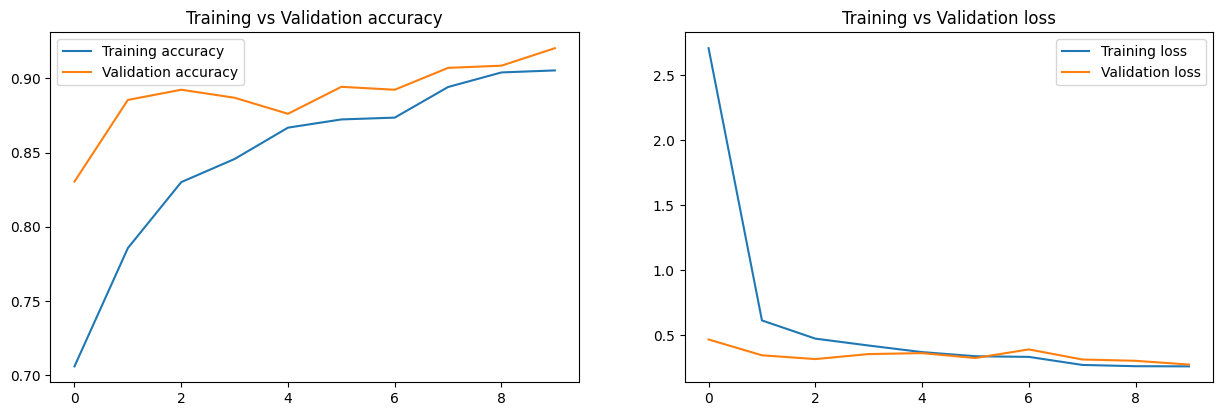

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.plot(accuracy, label='Training accuracy')
plt.plot(val_accuracy, label='Validation accuracy')
plt.legend()
plt.title("Training vs Validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label = "Validation loss")
plt.legend()
plt.title("Training vs Validation loss")
plt.show()

**Testing the model on a diff image**

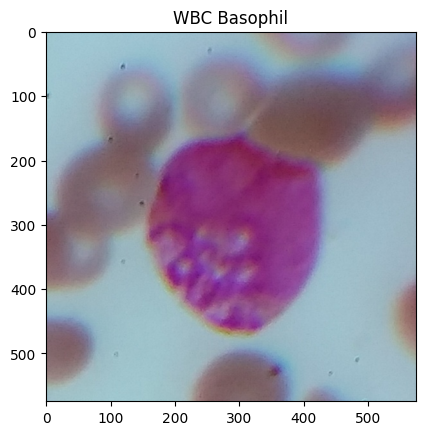

In [ ]:
'''###making simple prediction###'''
from tensorflow.keras.utils import load_img, img_to_array

testImage="archive/TestA/TestA/Basophil/20190531_114409_1.jpg"
test_image=load_img(testImage,target_size=(180,180))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image, axis=0)
result= model.predict(test_image, verbose=0)

img =cv2.imread(testImage)
#gray = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.imshow(img)
plt.title(f'WBC {class_names[np.argmax(result)]}')
plt.show()


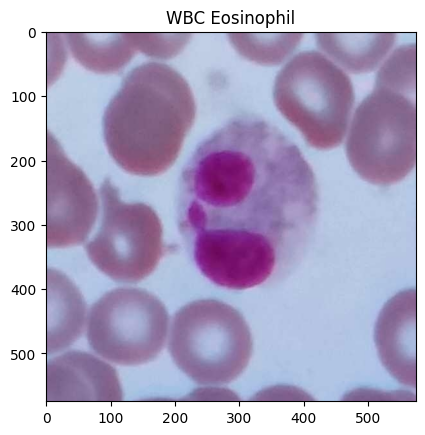

In [ ]:
'''###making single prediction###'''
testImage="archive/TestA/TestA/Eosinophil/95-8-27-1_100_2.jpg"
test_image=load_img(testImage, target_size=(180,180))
test_image=img_to_array(test_image)

test_image=np.expand_dims(test_image, axis=0)
result= model.predict(test_image, verbose=0)

img=cv2.imread(testImage)
#gray=

plt.imshow(img)
plt.title(f'WBC {class_names[np.argmax(result)]}')
plt.show()

#print('Prediction is:', ResultMap[np.argmax(result)])

In [ ]:
y_true=np.argmax(y_true,axis=1)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       212
           1       0.91      0.78      0.84       744
           2       0.96      0.98      0.97      2427
           3       0.95      0.82      0.88       561
           4       0.96      0.99      0.98      4196

    accuracy                           0.96      8140
   macro avg       0.96      0.91      0.93      8140
weighted avg       0.96      0.96      0.96      8140



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)

In [ ]:
cm

array([[ 210,    1,    1,    0,    0],
       [   1,  583,   44,    8,  108],
       [   0,    9, 2382,    8,   28],
       [   0,   34,   28,  460,   39],
       [   0,   14,   18,    6, 4158]], dtype=int64)

Normalized confusion matrix


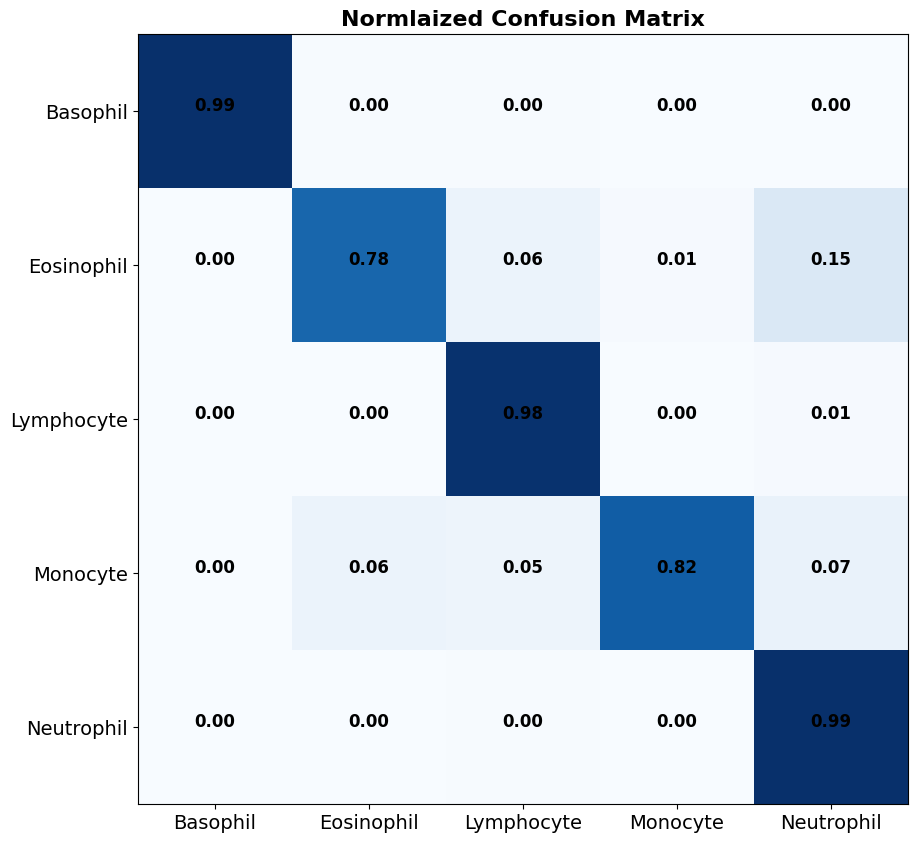

In [ ]:
import itertools
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print ("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title, weight='bold', fontsize=16)
  tick_marks= np.arange(len(classes))
  plt.xticks(tick_marks, classes, fontsize=14)
  plt.yticks(tick_marks, classes, fontsize=14)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center", fontsize=12, weight='bold')

#Compute confusion matrix
cnf_matrix = confusion_matrix(y_true, y_pred)
np.set_printoptions(precision=2)

#plot non-normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=['Basophil', 'Eosinophil', 'Lymphocyte', 'Monocyte', 'Neutrophil'], normalize=True, title='Normlaized Confusion Matrix')
plt.show()